# Facial Keypoint Detection
## W207 Final Project
### Summer 2019
### T. P. Goter



In [1]:
%matplotlib inline
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
# Load data from the CSV
df = pd.read_csv('./facial-keypoints-detection/training.csv')



# Data Exploration Begins
Let's start with simply looking at the data columns we have. We will then look for missing data.

In [3]:
def header(text):
    print(50*"=")
    print(text)
    print(50*"=")

In [4]:
header("Column Labels")
for c, col in enumerate(df.columns):
    print("Column {:d}: {}".format(c, col))
    

df_desc = df.describe()
desc_data = [df_desc.loc[label].values for label in df_desc.index ]

Column Labels
Column 0: left_eye_center_x
Column 1: left_eye_center_y
Column 2: right_eye_center_x
Column 3: right_eye_center_y
Column 4: left_eye_inner_corner_x
Column 5: left_eye_inner_corner_y
Column 6: left_eye_outer_corner_x
Column 7: left_eye_outer_corner_y
Column 8: right_eye_inner_corner_x
Column 9: right_eye_inner_corner_y
Column 10: right_eye_outer_corner_x
Column 11: right_eye_outer_corner_y
Column 12: left_eyebrow_inner_end_x
Column 13: left_eyebrow_inner_end_y
Column 14: left_eyebrow_outer_end_x
Column 15: left_eyebrow_outer_end_y
Column 16: right_eyebrow_inner_end_x
Column 17: right_eyebrow_inner_end_y
Column 18: right_eyebrow_outer_end_x
Column 19: right_eyebrow_outer_end_y
Column 20: nose_tip_x
Column 21: nose_tip_y
Column 22: mouth_left_corner_x
Column 23: mouth_left_corner_y
Column 24: mouth_right_corner_x
Column 25: mouth_right_corner_y
Column 26: mouth_center_top_lip_x
Column 27: mouth_center_top_lip_y
Column 28: mouth_center_bottom_lip_x
Column 29: mouth_center_bot

In [5]:
df_desc

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [6]:
df_noleo.describe()

NameError: name 'df_noleo' is not defined

In [ ]:
desc_data

In [ ]:
header("Dataframe Description")
header("Counts by Label")
print(df.describe().loc['count'])
header("Max Value by Label")
print(df.describe().loc['max'])
header("Min Value by Label")
print(df.describe().loc['min'])
header("Range of Values by Label")
print(df.describe().loc['max'] - df.describe().loc['min'])

## Results from Descriptive Summary
### Counts
There are up to 7039 training examples for some of the facial keypoints (e.g., left eye center) and as few as 2225 for others such as left eyebrows. Just by looking at the summary data it is unclear if this is because the image itself only shows part of a face or if those labels are just missing. Either way it would take too much time and effort to label ~5000 of the photos by hand. We will likely have to use just the data we have access to. If we build individual models for each keypoint coordinate, that would maximize our use of the training data.  
### Feature Ranges
The mins, maxs and ranges of x, y coordinates for our keypoints indicates that the images are far from centered. We only have 96 pixels and our ranges are on the order of 70 (obviously depending on which parameter we are looking at).  Perhaps we should try to plot up the image with the min and max of each parameter to understand the range of the images we are looking at. In fact, let's do that now.


In [ ]:
# Create a mini-dataframe with only the most extreme facial keypoints
range_df = pd.DataFrame()
for col in df.columns[:-1]:
    range_df = pd.concat([range_df,
                          pd.DataFrame(df.iloc[df[col].idxmin()]).T,
                          pd.DataFrame(df.iloc[df[col].idxmax()]).T])

range_df['Image'] = range_df['Image'].map(lambda x: np.array(x.split()).astype(int) / 255.0)


In [ ]:
fig, axes = plt.subplots(int(range_df.shape[0]/4),4,
                         figsize=(15,range_df.shape[0]),
                         sharex=True, sharey=True,
                         subplot_kw={'xticks': [], 'yticks': []})
axes = axes.flatten()
c = -2
for i, image in enumerate(range_df.Image):
    axes[i].set_ylim(96,0)
    axes[i].set_xlim(0,96)
    axes[i].imshow(np.reshape(image,(96,96)), origin='upper', cmap='gray')
    
    if i %4 ==0: 
        c+=2
    axes[i].scatter(x=range_df.iloc[i, c],
                    y=range_df.iloc[i, c+1])
    if i % 2 == 0:
        axes[i].set_title('Min of {}'.format(range_df.columns[int(i/2)]))
    else:
        axes[i].set_title('Max of {}'.format(range_df.columns[int(i/2)]))
# Adjust some of the spacing between the subplots
    fig.subplots_adjust(left=0.03, right=0.97, hspace=0.15, wspace=0.2)
    fig.suptitle("Most Extreme Training Examples", fontsize=18, y=0.89)

## Freaking Leo
Looks like Leo's data is all messed up based on the plot above. Let's look at all of his data to see if any of it is salvageable. To do this, we find Leo's index in the dataframe. It is 1907. So let's look at that in more detail.

left_eye_center_x                                                      22.7633
left_eye_center_y                                                      55.6172
right_eye_center_x                                                     1.52853
right_eye_center_y                                                      56.405
left_eye_inner_corner_x                                                 19.065
left_eye_inner_corner_y                                                56.2912
left_eye_outer_corner_x                                                27.5719
left_eye_outer_corner_y                                                56.3844
right_eye_inner_corner_x                                               5.75105
right_eye_inner_corner_y                                               56.7439
right_eye_outer_corner_x                                                   NaN
right_eye_outer_corner_y                                                   NaN
left_eyebrow_inner_end_x                            

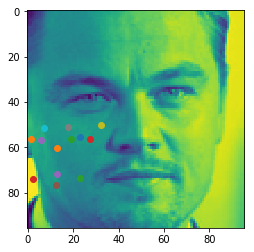

In [65]:
mini_df = df.iloc[1907]
plt.imshow(
    np.reshape(
        np.array([int(x)/255 for x in mini_df['Image'].split()]),
        (96,96)))
plt.scatter(mini_df.left_eye_center_x, mini_df.left_eye_center_y)
plt.scatter(mini_df.right_eye_center_x, mini_df.right_eye_center_y)
plt.scatter(mini_df.left_eye_inner_corner_x, mini_df.left_eye_inner_corner_y)
plt.scatter(mini_df.left_eye_outer_corner_x, mini_df.left_eye_outer_corner_y)
plt.scatter(mini_df.right_eye_inner_corner_x, mini_df.right_eye_inner_corner_y)
plt.scatter(mini_df.right_eye_outer_corner_x, mini_df.right_eye_outer_corner_y)
plt.scatter(mini_df.right_eye_outer_corner_x, mini_df.right_eye_outer_corner_y)
plt.scatter(mini_df.left_eyebrow_inner_end_x, mini_df.left_eyebrow_inner_end_y)
plt.scatter(mini_df.left_eyebrow_outer_end_x, mini_df.left_eyebrow_outer_end_y)
plt.scatter(mini_df.right_eyebrow_inner_end_x, mini_df.right_eyebrow_inner_end_y)
plt.scatter(mini_df.right_eyebrow_outer_end_x, mini_df.right_eyebrow_outer_end_y)
plt.scatter(mini_df.nose_tip_x, mini_df.nose_tip_y)
plt.scatter(mini_df.mouth_left_corner_x, mini_df.mouth_left_corner_y)
plt.scatter(mini_df.mouth_right_corner_x, mini_df.mouth_right_corner_y)
plt.scatter(mini_df.mouth_center_top_lip_x, mini_df.mouth_center_top_lip_y)
plt.scatter(mini_df.mouth_center_bottom_lip_x, mini_df.mouth_center_bottom_lip_y)
mini_df

## Leo Continued
Oh boy, it looks like all of Leo's data is in our lower left quadrant. That doesn't seem right. It could be a scaling issue. But for now we will assume the presence of Leo in our dataset will not tip the accuracy scales in our favor. So we will remove him, and repeat our plotting of the extreme values.

In [8]:
# Create a mini-dataframe with only the most extreme facial keypoints
range_df = pd.DataFrame()
df_noleo = df.drop(1907)
for col in df.columns[:-1]:
    range_df = pd.concat([range_df,
                          pd.DataFrame(df_noleo.iloc[df_noleo[col].idxmin()]).T,
                          pd.DataFrame(df_noleo.iloc[df_noleo[col].idxmax()]).T])

In [9]:
df_noleo.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7038.000000,7038.000000,7035.000000,7035.000000,2270.000000,2270.000000,2266.000000,2266.000000,2267.000000,2267.000000,...,7048.000000,7048.000000,2268.000000,2268.000000,2269.000000,2269.000000,2274.000000,2274.000000,7015.000000,7015.000000
mean,66.365216,37.648681,30.310192,37.974323,59.177002,37.936670,73.350672,37.698766,36.666238,37.981629,...,48.379213,62.716259,63.303532,75.971811,32.913914,76.180672,47.990966,72.919896,48.574609,78.970480
std,3.409088,3.145867,3.064296,3.025869,2.555855,2.275459,3.268043,2.855217,2.259337,2.278594,...,4.259481,5.720886,3.990884,4.580436,3.912811,4.418578,3.239899,5.223604,4.248532,5.408157
min,35.348452,1.616512,0.686592,4.091264,32.982623,27.190098,40.609707,26.250023,18.194942,26.250023,...,15.245020,17.932414,35.888836,57.023258,2.784647,56.690208,18.338675,56.719043,17.884110,25.850503
25%,65.083360,35.900374,28.783866,36.327616,58.039967,36.625142,71.719072,36.084928,35.508262,36.766738,...,46.604053,59.291570,61.258423,72.875428,30.798464,73.251911,46.495048,69.394874,46.575271,75.548802
50%,66.497912,37.527839,30.251448,37.812736,59.304843,37.877466,73.248329,37.636328,36.651935,37.943451,...,48.424901,63.452070,63.180440,75.779098,32.983837,76.002869,47.906211,72.606166,48.595366,78.697123
75%,68.024814,39.257208,31.768358,39.565489,60.520167,39.259940,75.016610,39.367346,37.753598,39.187936,...,50.330579,66.493373,65.378637,78.879842,35.102659,78.957386,49.296503,76.222497,50.678337,82.234152
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


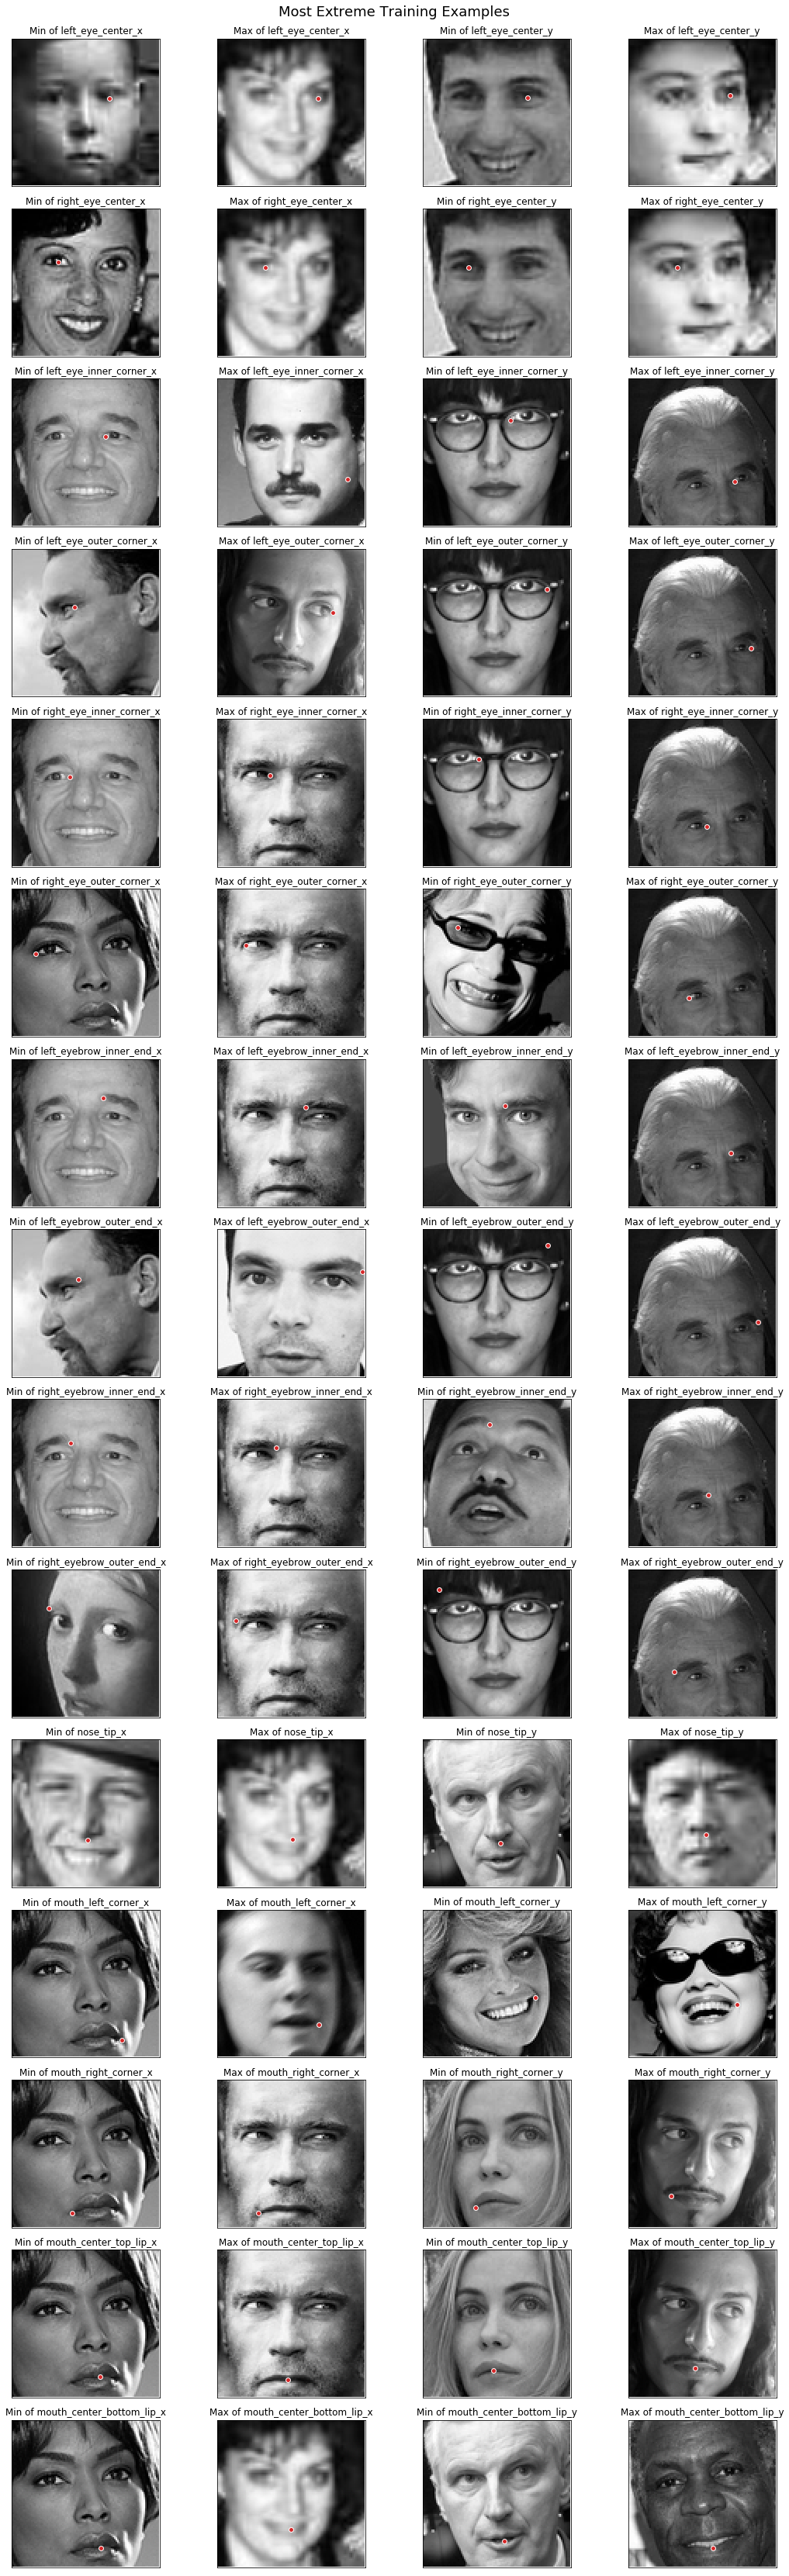

In [10]:
range_df['Image'] = range_df['Image'].map(lambda x: np.array(x.split()).astype(int) / 255.0)
fig, axes = plt.subplots(int(range_df.shape[0]/4),4,
                         figsize=(15,range_df.shape[0]),
                         sharex=True, sharey=True,
                         subplot_kw={'xticks': [], 'yticks': []})
axes = axes.flatten()
c = -2
for i, image in enumerate(range_df.Image):
    axes[i].set_ylim(96,0)
    axes[i].set_xlim(0,96)
    axes[i].imshow(np.reshape(image,(96,96)), origin='upper', cmap='gray')
    
    if i %4 ==0: 
        c+=2
    axes[i].scatter(x=range_df.iloc[i, c],
                    y=range_df.iloc[i, c+1],
                   s=35, c = 'tab:red', edgecolors='white')
    if i % 2 == 0:
        axes[i].set_title('Min of {}'.format(range_df.columns[int(i/2)]))
    else:
        axes[i].set_title('Max of {}'.format(range_df.columns[int(i/2)]))
# Adjust some of the spacing between the subplots
    fig.subplots_adjust(left=0.03, right=0.97, hspace=0.15, wspace=0.2)
    fig.suptitle("Most Extreme Training Examples", fontsize=18, y=0.89)

## Mustachioed Fellow
Without Leo, are plot of the extreme values looks a lot better. However, the Max of left_eye_inner_corner_x seems off judging by our plot. The question is "Are there more problems with the Mustachioed Fellow" or not? Let's find out.

In [11]:
# Create a mini-dataframe with only the most extreme facial keypoints
range_df = pd.DataFrame()
df_nostache = df_noleo.drop(1877)
for col in df.columns[:-1]:
    range_df = pd.concat([range_df,
                          pd.DataFrame(df_nostache.iloc[df_nostache[col].idxmin()]).T,
                          pd.DataFrame(df_nostache.iloc[df_nostache[col].idxmax()]).T])

In [12]:
range_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
count,58.000000,58.000000,58.000000,58.000000,43.000000,43.000000,44.000000,44.000000,44.000000,44.000000,...,60.000000,46.000000,46.000000,44.000000,44.000000,46.000000,46.000000,60.000000,60.000000,60
unique,24.000000,24.000000,24.000000,24.000000,15.000000,15.000000,16.000000,16.000000,16.000000,16.000000,...,25.000000,17.000000,17.000000,16.000000,16.000000,17.000000,17.000000,25.000000,25.000000,25
top,62.771469,37.632922,30.480501,40.335691,57.650434,38.604971,68.472887,39.073925,36.289082,41.710783,...,62.728794,62.156341,82.989641,40.122099,85.231171,51.822887,82.810319,51.890133,85.500155,89 76 67 65 70 68 63 68 74 81 78 82 88 89 87 8...
freq,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8


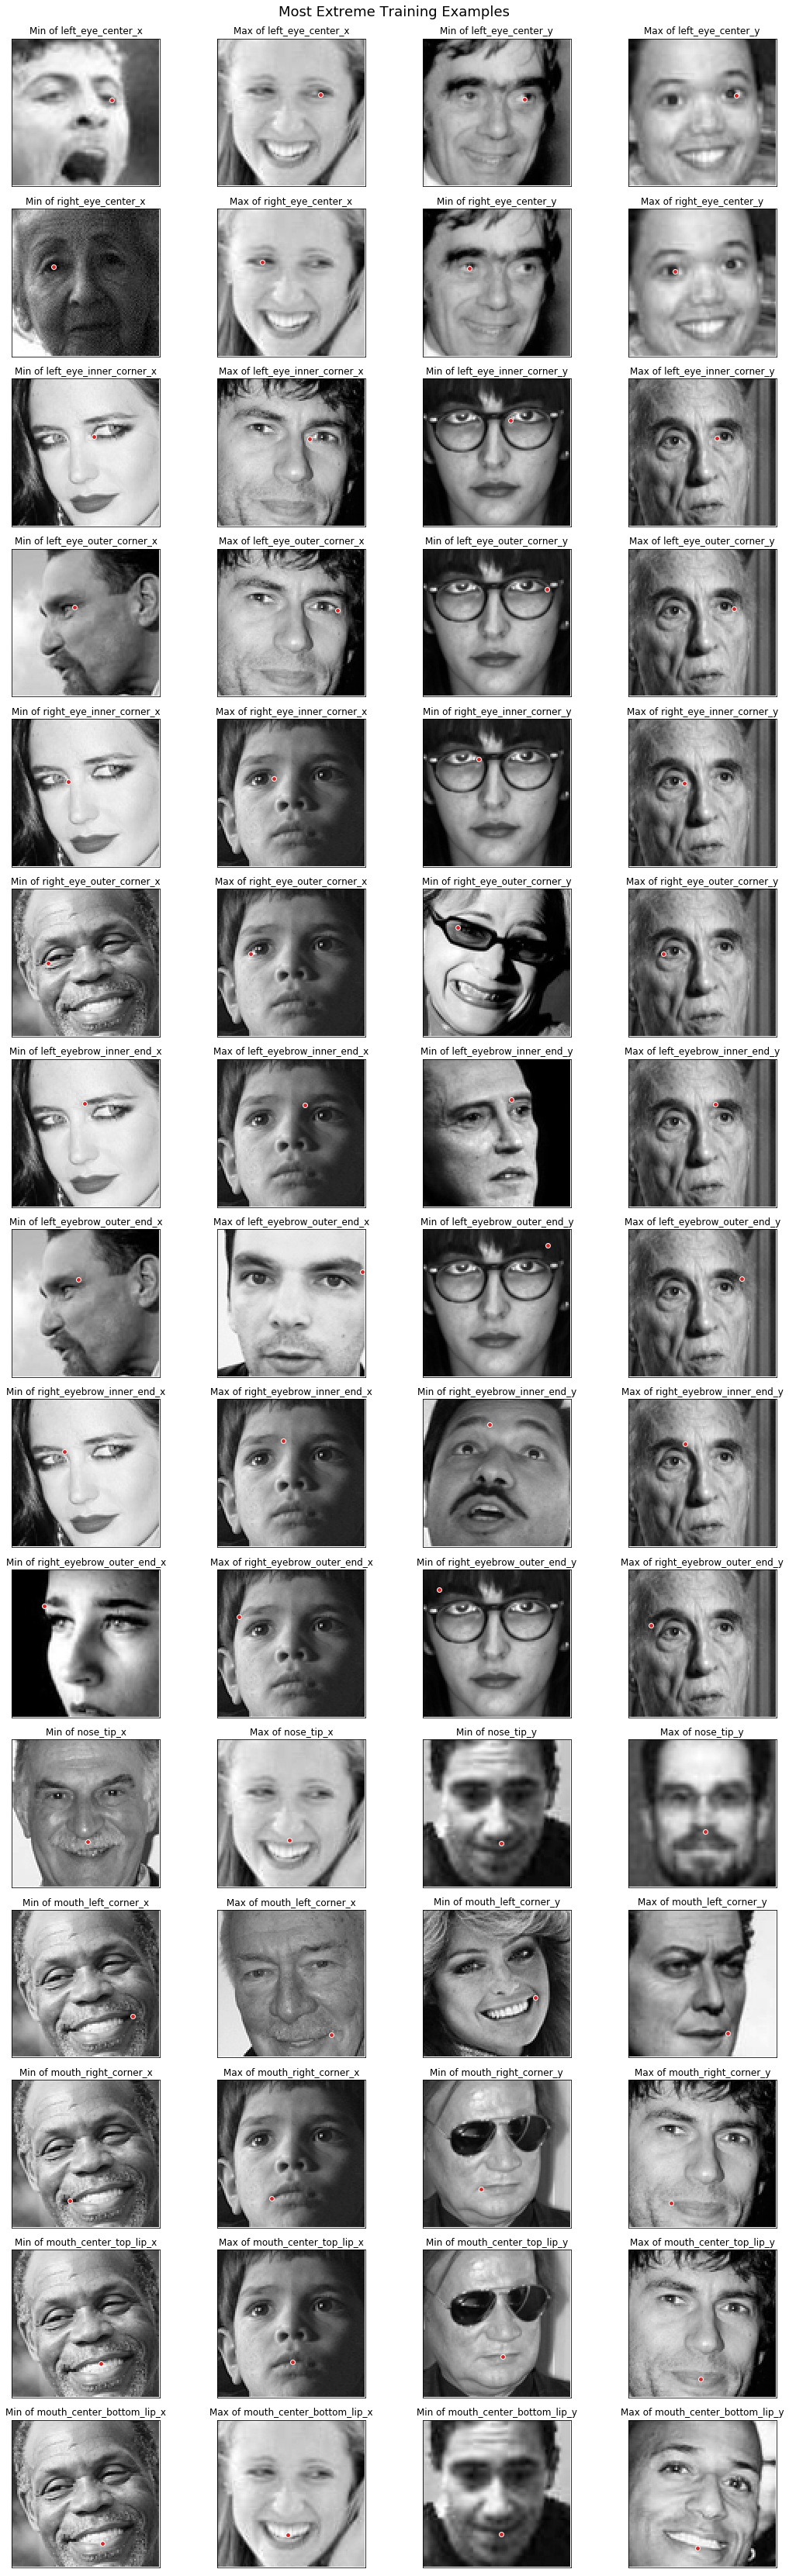

In [13]:
range_df['Image'] = range_df['Image'].map(lambda x: np.array(x.split()).astype(int) / 255.0)
fig, axes = plt.subplots(int(range_df.shape[0]/4),4,
                         figsize=(15,range_df.shape[0]),
                         sharex=True, sharey=True,
                         subplot_kw={'xticks': [], 'yticks': []})
axes = axes.flatten()
c = -2
for i, image in enumerate(range_df.Image):
    axes[i].set_ylim(96,0)
    axes[i].set_xlim(0,96)
    axes[i].imshow(np.reshape(image,(96,96)), origin='upper', cmap='gray')
    
    if i %4 ==0: 
        c+=2
    axes[i].scatter(x=range_df.iloc[i, c],
                    y=range_df.iloc[i, c+1],
                   s=35, c = 'tab:red', edgecolors='white')
    if i % 2 == 0:
        axes[i].set_title('Min of {}'.format(range_df.columns[int(i/2)]))
    else:
        axes[i].set_title('Max of {}'.format(range_df.columns[int(i/2)]))
# Adjust some of the spacing between the subplots
    fig.subplots_adjust(left=0.03, right=0.97, hspace=0.15, wspace=0.2)
    fig.suptitle("Most Extreme Training Examples", fontsize=18, y=0.89)

## Moving On
Alright, it looks like at least we have our ranges properly bounded. For our next step, let's plot the average value for each keypoint and also look at the distributions of the keypoint data. We will do this visually through the creation of an iteractive plot. That allows us to pick different features to view.

In [15]:
image_options = widgets.IntSlider(
    value=0,
    min=0,
    max=df_nostache.shape[0],
    step=1,
    description='Pick an Image:',
    disabled=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

def show_average_keypoint(keypoint=[c[:-2] for c in df_nostache.columns[:-1:2]],
                          im = image_options, marker='o v ^ < > s p * h H D d P X'.split()):
        temp_pic = np.array([int(x)/255 for x in df_nostache.Image[im].split()])
        fig, ax = plt.subplots(1,1,figsize=(10,10),
                         subplot_kw={'xticks': [], 'yticks': []} )
        ax.imshow(np.reshape(temp_pic,(96,96)), origin='upper', cmap='gray')
        ax.scatter(x=df_nostache[keypoint+'_x'], y=df_nostache[keypoint+'_y'],
                  s=40, c='tab:orange', edgecolors='white', marker='x', alpha=0.5)
        ax.scatter(x=df_nostache[keypoint+'_x'].mean(), y=df_nostache[keypoint+'_y'].mean(),
                  s=150, c='tab:red', edgecolors='white', marker=marker)

interact_manual(show_average_keypoint)

interactive(children=(Dropdown(description='keypoint', options=('left_eye_center', 'right_eye_center', 'left_e…

<function __main__.show_average_keypoint(keypoint=['left_eye_center', 'right_eye_center', 'left_eye_inner_corner', 'left_eye_outer_corner', 'right_eye_inner_corner', 'right_eye_outer_corner', 'left_eyebrow_inner_end', 'left_eyebrow_outer_end', 'right_eyebrow_inner_end', 'right_eyebrow_outer_end', 'nose_tip', 'mouth_left_corner', 'mouth_right_corner', 'mouth_center_top_lip', 'mouth_center_bottom_lip'], im=IntSlider(value=0, description='Pick an Image:', max=7047), marker=['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])>

## Separate Training and Development Data and Normalize Image Data
We have no assessed our training data and it is time to separate training data from development data so that we can tune our hyperparameters as necessary as we build various models.

In [18]:
# Data in the image column is space separated strings - convert to int then normalize to the scale of 0 to 1
training_images = df_nostache['Image'].map(lambda x: np.array(x.split()).astype(int) / 255.0)

# How many images do we have
training_images.shape

(7047,)

In [19]:
# Split images into training/dev sets - test set separated
train_X = training_images[:-1000]
train_Y = df_nostache.iloc[:-1000,:-1]
dev_X = training_images[-1000:] 
dev_Y = df_nostache.iloc[-1000:,:-1]

# 
print("Training data consist of {} examples".format(train_X.shape))
print("Training labels consist of {} labels".format(train_Y.shape))
print("Development data consist of {} examples".format(dev_X.shape))
print("Development labels consists of {} labels".format(dev_Y.shape))

Training data consist of (6047,) examples
Training labels consist of (6047, 30) labels
Development data consist of (1000,) examples
Development labels consists of (1000, 30) labels


In [20]:
dev_X.head(5)

6049    [0.10588235294117647, 0.1411764705882353, 0.17...
6050    [0.12941176470588237, 0.1568627450980392, 0.12...
6051    [0.35294117647058826, 0.39215686274509803, 0.4...
6052    [0.8274509803921568, 0.8, 0.7254901960784313, ...
6053    [0.027450980392156862, 0.0392156862745098, 0.0...
Name: Image, dtype: object

## The model building begins
Alright. Now we have our data separated and it is time to determine what to use as our baseline model. We will compare against this model to determine how various models can improve accuracy of predictions.

## The Baseline Model
The baseline model will simply be the average value of each feature. This is highly simplistic and won't be very accurate, but it should provide us with ample room to improve.

### Scoring
Per the Kaggle Competition instructions, scores are judged based on the Root Mean Squared Error given by the equation below.
$$RMSE = \sqrt{\frac{1}{n}\cdot\sum\limits_{i=1}^{n}(y-\hat{y})^2}$$

In [21]:
def rmse_func(predictions, actuals):
    print(np.sqrt(np.nanmean((actuals-predictions)**2)))
    print(np.sqrt(1/len(actuals)*np.nansum((actuals-predictions)**2)))
#     return np.sqrt(np.nanmean((actuals-predictions)**2))

In [22]:
# Predict with simple average of feature location
bl_predictions = train_Y.mean(axis=0, skipna=True)
rmse_func(bl_predictions, dev_Y)

4.2811994566715805
12.10603302602835


In [29]:
# Testing the example from kaggle competition page, where we extract a square around each keypoint.
# https://www.kaggle.com/c/facial-keypoints-detection/overview/getting-started-with-r

coord = "left_eye_center"
patch_size = 10

coord_x = coord + '_x'
coord_y = coord + '_y'

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [47]:
train_Y.left_eye_center_x[1]

64.3329361702

In [59]:
len(train_X[0])

9216

(x,y)=(66.60715789470001,38.9381052632), range=(56:76, 28:48)


IndexError: arrays used as indices must be of integer (or boolean) type

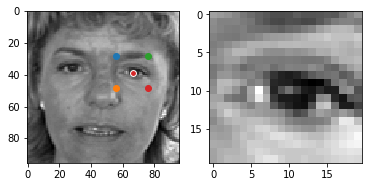

In [139]:
patches = pd.DataFrame()

for i in [14]:
    im  = train_X[i].reshape(96, 96)
    x   = train_Y.left_eye_center_x[i]
    y   = train_Y.left_eye_center_y[i]
    x1  = int(x-patch_size)
    x2  = int(x+patch_size)
    y1  = int(y-patch_size)
    y2  = int(y+patch_size)
    print("(x,y)=({},{}), range=({}:{}, {}:{})".format(x, y, x1,x2,y1,y2))
    plt.subplot(1,2,1)
    plt.imshow(im, cmap='gray')
    plt.scatter(x=x, y=y, s=35, c = 'tab:red', edgecolors='white')
    plt.scatter(x1,y1)
    plt.scatter(x1,y2)
    plt.scatter(x2,y1)
    plt.scatter(x2,y2)
    plt.subplot(1,2,2)
    plt.imshow(np.array(im[y1:y2,x1:x2]), origin='upper', cmap='gray')
    patches = pd.concat(patches, im[im[y1:y2,x1:x2]])
    
    #if ( (np.isnan(x)) && (!is.na(y)) && (x1>=1) && (x2<=96) && (y1>=1) && (y2<=96) ):
    #    as.vector(im[x1:x2, y1:y2])
    #else:
    #    NULL
#mean.patch <- matrix(data = colMeans(patches), nrow=2*patch_size+1, ncol=2*patch_size+1)